# Decision Tree and Regression Tree

## Classification

We will implement and train this model on the palmerpenguins dataset, and get started by running the following code in the cell below.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

We first visulize the dataset based on 'bill length[mm]' and 'bill depth[mm]' features.

### 1.Data preprocessing

In [3]:
df.dropna(inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


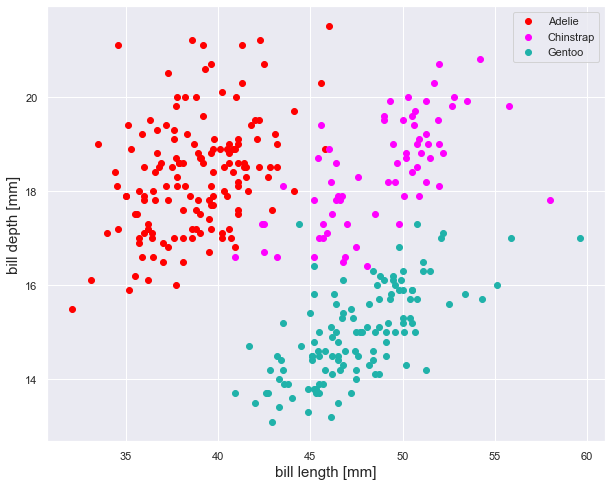

In [5]:
penguin = df.species.unique().tolist()
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

Next, we initilize feature matrix X and label y

In [34]:
X = df[["bill_length_mm","bill_depth_mm"]].to_numpy()
y = df["species"].to_numpy()

In [35]:
y = np.where(y=="Adelie",0,y)
y = np.where(y=="Chinstrap",1,y)
y = np.where(y=="Gentoo",2,y)

In [37]:
y = y.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### 2. Train Decision Tree Model

As with all machine learning tasks, we need split our data into a training and testing subsets. This can be done by calling the sklearn.model_selection.train_test_split() function. Run the following code cell to create this split and to visualize the training data.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Next we instantiate an instance of the sklearn.tree.DecisionTreeClassifier model. and train the model by calling the fit() method. This can be shown by running the following code cell.



In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

Now that our model has been trained we can visualize the tree structure of our current model by calling the sklearn.tree.plot_tree() function. An example of this can be seen by running the following code cell.



|--- x_1 <= 16.45
|   |--- x_0 <= 39.70
|   |   |--- class: 0
|   |--- x_0 >  39.70
|   |   |--- x_1 <= 16.35
|   |   |   |--- class: 2
|   |   |--- x_1 >  16.35
|   |   |   |--- x_0 <= 46.65
|   |   |   |   |--- class: 2
|   |   |   |--- x_0 >  46.65
|   |   |   |   |--- class: 1
|--- x_1 >  16.45
|   |--- x_0 <= 44.65
|   |   |--- x_0 <= 42.35
|   |   |   |--- class: 0
|   |   |--- x_0 >  42.35
|   |   |   |--- x_1 <= 18.30
|   |   |   |   |--- x_0 <= 43.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_0 >  43.80
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  18.30
|   |   |   |   |--- class: 0
|   |--- x_0 >  44.65
|   |   |--- x_0 <= 56.15
|   |   |   |--- x_1 <= 21.10
|   |   |   |   |--- x_0 <= 45.85
|   |   |   |   |   |--- x_1 <= 18.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_1 >  18.80
|   |   |   |   |   |   |--- x_1 <= 19.15
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_1 >  19.15
|   |   |   |   |   | 

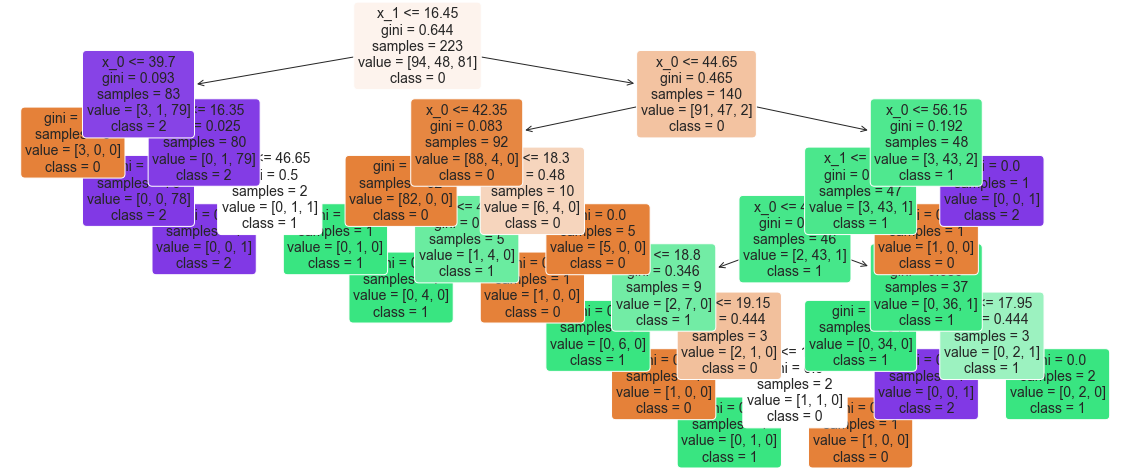

In [51]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["0", "1","2"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

The figure above depicts a graph theoretic tree that is used to make predictions. Suppose you would like to make a prediction on a given feature vector $x = [x_0, x_1]^T$. To do this, follow these steps:

Start at the root node (depth 0, at the top).
If $x_1 \le 16.45$, then you then move down to the root's left child node (depth 1, left), otherwise move down to the root's right child node (depth 1, right).
Repeat the process (illustrated in 2) of moving to successive child nodes according to satifying the boolean condition specified at each parent node until you reach a leaf node (a node with no child nodes).
The predicted class of this leaf node will be the predicted class of our feature vector $x = [x_0, x_1]^T$.



That's it! We can visualize the decision regions generated by our trained decision tree by running the following code cell.


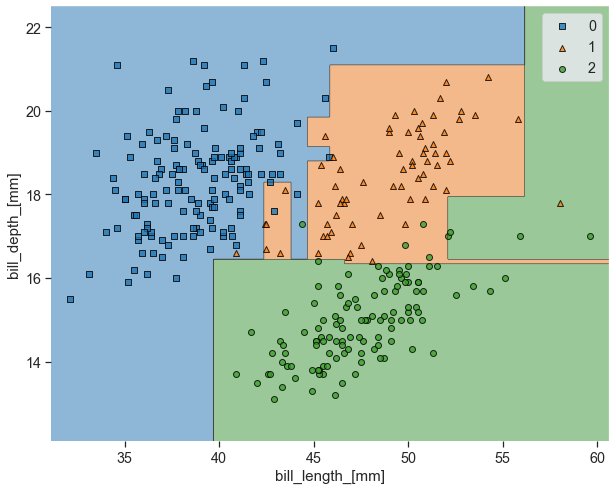

In [52]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
# we should mention that y in the plot_decision_regions must be integer
plt.xlabel("bill_length_[mm]", fontsize = 15)
plt.ylabel("bill_depth_[mm]", fontsize = 15)
plt.legend()
plt.grid()
plt.show()

From the plot above, the decision regions looks good. next, we can perform the error analysis

### 3. Error Analysis

As with all machine learning models, we next evaluate our models performance on the testing data. This is done by running the following two code cells.

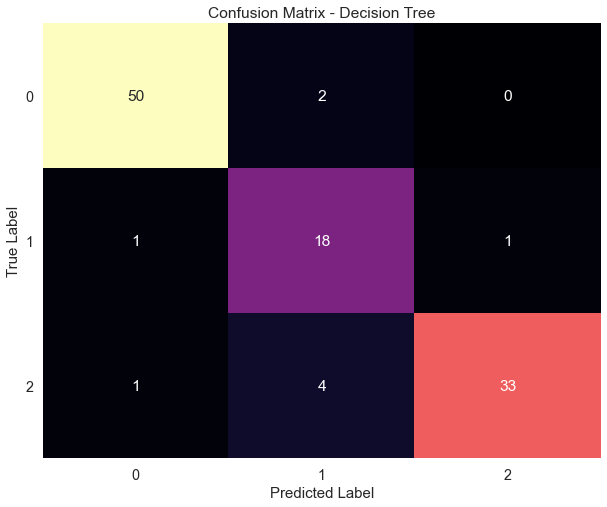

In [53]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["0", "1","2"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["0", "1","2"], rotation=0)
plt.show()

In [54]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.75      0.90      0.82        20
           2       0.97      0.87      0.92        38

    accuracy                           0.92       110
   macro avg       0.89      0.91      0.90       110
weighted avg       0.93      0.92      0.92       110



precision is used to measure what percent of positive cases are right.

recall is used to measure what percent of positive case did we catch.

From the classification report, we can see that precision and recall of these three species all are high. The reason why the precision of second species is lower that others is that the second species cases used to train the model is small compared with others.

# Regression Tree

Next, we would implement and train the Regression Tree model on diabetes dataset which can be loaded from sklearn.datasets.

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

We initilize the feature X matrix and label array y.

In [57]:
X, y = load_diabetes(return_X_y = True)

Using X_train and y_train to train the model, we first set max_depth is 1 and 20 respectively, and through MSE to evaluate the performance of the model.

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")


MSE reg1: 4488.292921976607 

MSE reg2: 7112.927927927928 



We can see that MSE when max_depth is 1 is lower that of when max_depth is 20. so, we try the max_depth between 1 and 20.

In [67]:

reg3 = DecisionTreeRegressor(max_depth=5, random_state = 12)
reg3.fit(X_train, y_train)
y_pred = reg3.predict(X_test)
print(f"MSE reg3: {mean_squared_error(y_test, y_pred)} \n")


reg4 = DecisionTreeRegressor(max_depth=10, random_state = 12)
reg4.fit(X_train, y_train)
y_pred = reg4.predict(X_test)
print(f"MSE reg4: {mean_squared_error(y_test, y_pred)} \n")


MSE reg3: 4375.334749874582 

MSE reg4: 6243.818980455796 



We set a loop to find the minimum MSE when max_depth is between 2 and 7.

In [69]:
for i in range(2,8):
    
    
    reg = DecisionTreeRegressor(max_depth=i, random_state = 12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"when max_depth is {i},MSE reg: {mean_squared_error(y_test, y_pred)} \n")




when max_depth is 2,MSE reg: 4021.79557627936 

when max_depth is 3,MSE reg: 4014.0499753125523 

when max_depth is 4,MSE reg: 4053.2253885454747 

when max_depth is 5,MSE reg: 4375.334749874582 

when max_depth is 6,MSE reg: 4357.953480364498 

when max_depth is 7,MSE reg: 4949.761984880612 



Finally, we find that when max_depth is 4, the MSE is minimized.

In [71]:
y.shape

(442,)

In [73]:
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

We find there are total 442 samples, and the value of y is big, considering which, the 4053 MSE is acceptable.